Import libraries

In [6]:
import os
import math
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

Defining helper functions

In [7]:
def load_pickle(path):

    with open(path, "rb") as f:
        data = pickle.load(f)
    
    return data


# For processing the MS 
def bin_MS(peaks, bin_resolution = 1.0, max_da = 500):

    mz = [p["mz"] for p in peaks]
    intensities = [p["intensity_norm"] for p in peaks]
    
    n_bins = int(math.ceil(max_da / bin_resolution))

    mz_binned = [0 for _ in range(n_bins)]
    for m, i in zip(mz, intensities):
        
        m = math.floor(m / bin_resolution)
        if m >= n_bins: continue 
        mz_binned[m] += i

    return mz_binned


Load in the data

In [3]:
path = "/data/rbg/users/klingmin/projects/MS_processing/data_splitting/nist2023/splits/data.pkl"
data = load_pickle(path)

Cluster the data

In [13]:
all_peaks = [bin_MS(r["peaks"]) for r in data[:10]]


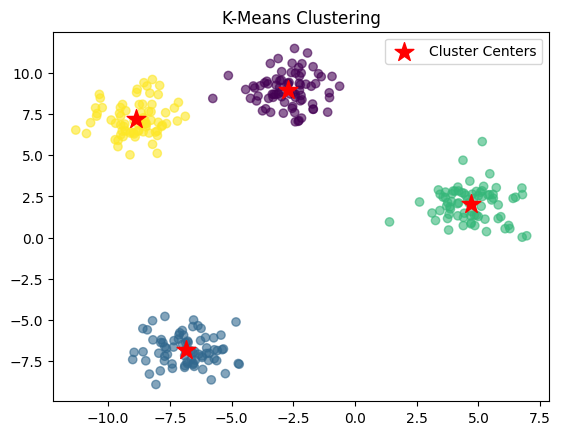

In [14]:

# 1. Generate synthetic 2D data (e.g., 300 points in 4 clusters)
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# 2. Create and fit the k-means model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# 3. Retrieve the cluster labels and the cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 4. Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], 
            c='red', marker='*', s=200, label='Cluster Centers')
plt.title("K-Means Clustering")
plt.legend()
plt.show()